In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
dw=pd.read_csv('winequality-white.csv') #for white coloured wine
dw.head(8)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6


In [3]:
dw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [4]:
dw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
dw.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

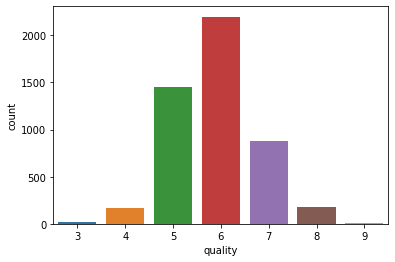

In [6]:
sns.countplot(x='quality',data=dw) #majority wine quality is 5 and 6.

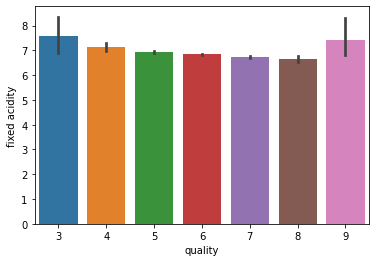

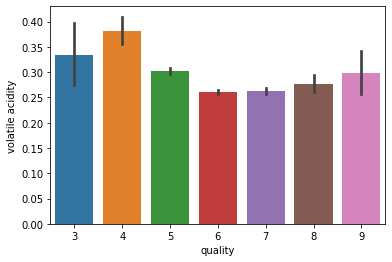

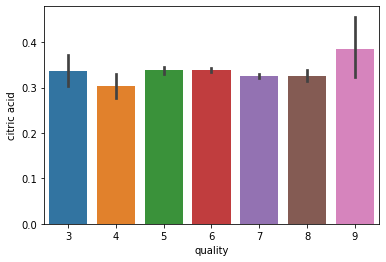

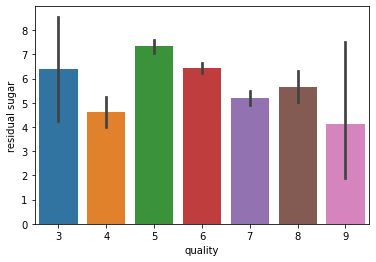

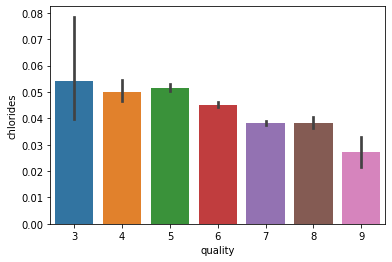

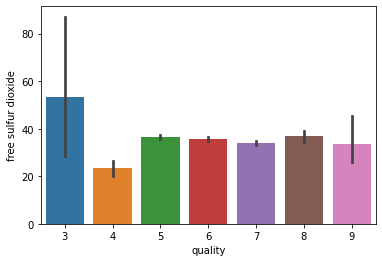

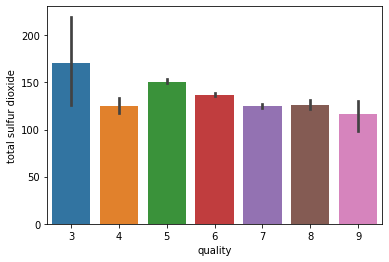

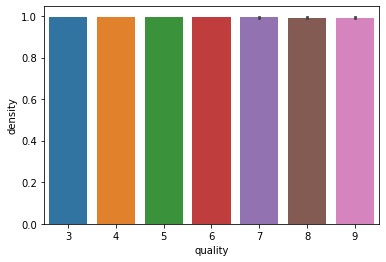

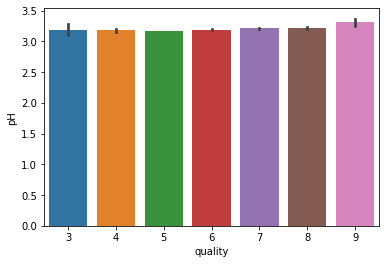

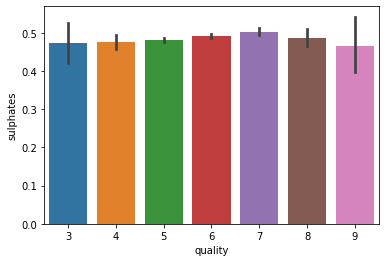

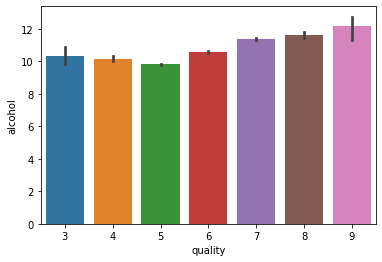

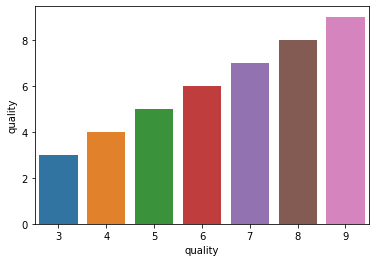

In [7]:
for i,col in dw.items():
  plt.figure(i)
  sns.barplot(x='quality',y=col,data=dw)

In [8]:
corredw=dw.corr()

<AxesSubplot:>

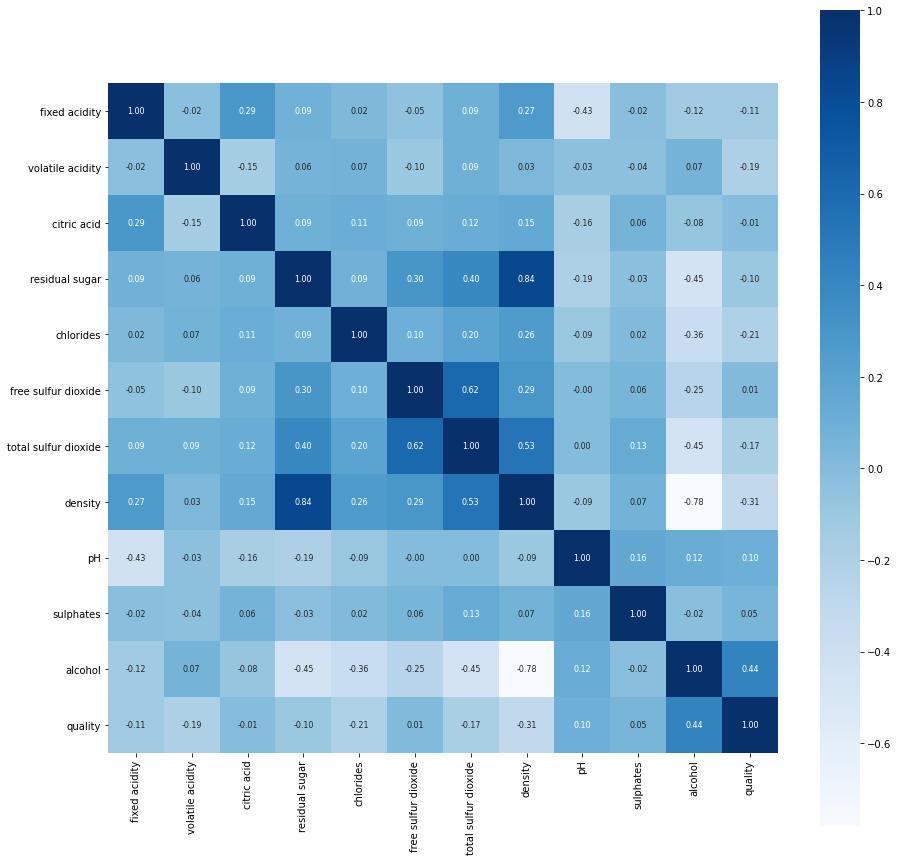

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(corredw,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='Blues')

In [10]:
xw=dw.drop('quality',axis=1)

In [11]:
bins=[0,6.5,10]
labels=[0,1]
dw['quality']=pd.cut(dw['quality'],bins=bins,labels=labels)

In [12]:
yw=dw['quality']
print(yw)

0       0
1       0
2       0
3       0
4       0
       ..
4893    0
4894    0
4895    0
4896    1
4897    0
Name: quality, Length: 4898, dtype: category
Categories (2, int64): [0 < 1]


In [13]:
xwtrain,xwtest,ywtrain,ywtest=train_test_split(xw,yw,test_size=0.2,random_state=0) #taking 20% of test from dataset

In [14]:
print(ywtrain.shape,ywtest.shape)

(3918,) (980,)


In [15]:
modeldw=RandomForestClassifier()

In [16]:
modeldw.fit(xwtrain,ywtrain)

RandomForestClassifier()

In [17]:
xwtestprediction=modeldw.predict(xwtest)
xwaccuracy=accuracy_score(xwtestprediction,ywtest)
print(xwaccuracy)

0.8714285714285714


In [18]:
inputxw=(7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9)
inputxwreshape=np.asarray(inputxw).reshape(1,-1)
print(modeldw.predict(inputxwreshape))
ans='BAD QUALITY WINE'
if modeldw.predict(inputxwreshape)==1:
                   ans='GOOD QUALITY WINE'
print(ans)

[0]
BAD QUALITY WINE


In [19]:
modeldwknn=KNeighborsClassifier()

In [20]:
modeldwknn.fit(xwtrain,ywtrain)

KNeighborsClassifier()

In [21]:
xktestprediction=modeldwknn.predict(xwtest)
xkaccuracy=accuracy_score(xktestprediction,ywtest)
print(xkaccuracy)

0.7877551020408163
